In [ ]:
import csv
import requests
from tqdm import tqdm
import json

from google.colab import drive
drive.mount('/content/gdrive')
# jupyter notebook path in your own google drive
workPath='/content/gdrive/My Drive/Colab Notebooks/Falcon/'
# demo data path in your own google drive
dataPath='/content/gdrive/My Drive/Colab Notebooks/Falcon/data/'

import sys
sys.path.append(workPath)
import falcon

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Falcon2 call for a drug drug interaction text
# Input: short text
# Input mode: 'short' for keywords and 'long' for short text
# Output: URIs in DBpedia and Wikidata KGs related to the entities in the sort text
text='The risk or severity of adverse effects can be increased when Lepirudin is combined with Deoxycholic Acid'

falcon_output=falcon.falcon2_call(text,'long')
print(json.dumps(falcon_output, sort_keys=True, indent=4))

{
    "entities_dbpedia": [
        [
            "http://dbpedia.org/resource/Lepirudin",
            "Lepirudin"
        ],
        [
            "http://dbpedia.org/resource/Deoxycholic_acid",
            "Deoxycholic Acid"
        ]
    ],
    "entities_wikidata": [
        [
            "risk or severity of adverse effects",
            "<http://www.wikidata.org/entity/Q70629676>"
        ],
        [
            "Lepirudin",
            "<http://www.wikidata.org/entity/Q95593885>"
        ],
        [
            "Deoxycholic Acid",
            "<http://www.wikidata.org/entity/Q425680>"
        ]
    ],
    "relations_dbpedia": [
        [
            "http://dbpedia.org/ontology/ground",
            "risk"
        ],
        [
            "http://dbpedia.org/ontology/order",
            "severity"
        ],
        [
            "http://dbpedia.org/ontology/cost",
            "adverse effects"
        ],
        [
            "http://dbpedia.org/property/extension",
           

In [ ]:
# BioFalcon call for a drug drug interaction text
# Input: short text
# Input mode: 'short' for keywords and 'long' for short text
# Output: CUI ID in UMLS related to the entities in the sort text

text='The risk or severity of adverse effects can be increased when Lepirudin is combined with Deoxycholic Acid'
bioFalcon_output=falcon.bioFalcon_call(text,'long')
print(json.dumps(bioFalcon_output, sort_keys=True, indent=4))

{
    "entities_UMLS": [
        [
            "risk",
            [
                "C0035647"
            ]
        ],
        [
            "severity",
            [
                "C0439793"
            ]
        ],
        [
            "adverse effects",
            [
                "C0879626"
            ]
        ],
        [
            "Lepirudin",
            [
                "C0772394"
            ]
        ],
        [
            "Deoxycholic acid",
            [
                "C0011479"
            ]
        ]
    ],
    "relations_UMLS": [
        [
            "increased",
            [
                "C0205217"
            ]
        ],
        [
            "combined",
            [
                "C0205195"
            ]
        ]
    ]
}


In [ ]:

# read a list of Drugs from DrugBank

filename=dataPath+'drug.csv'
with open(filename, 'r' , encoding='utf-8') as file:
    reader = csv.reader(file,delimiter=',')
    rows=list(reader)
rows.pop(0)
drugs=rows




In [ ]:
drugs

[['DB00001', 'Lepirudin'],
 ['DB00002', 'Cetuximab'],
 ['DB00003', 'Dornase alfa'],
 ['DB00004', 'Denileukin diftitox'],
 ['DB00005', 'Etanercept'],
 ['DB00006', 'Bivalirudin'],
 ['DB00007', 'Leuprolide'],
 ['DB00008', 'Peginterferon alfa-2a'],
 ['DB00009', 'Alteplase'],
 ['DB00010', 'Sermorelin'],
 ['DB00011', 'Interferon alfa-n1'],
 ['DB00012', 'Darbepoetin alfa'],
 ['DB00013', 'Urokinase'],
 ['DB00014', 'Goserelin'],
 ['DB00015', 'Reteplase'],
 ['DB00016', 'Erythropoietin'],
 ['DB00017', 'Salmon Calcitonin'],
 ['DB00018', 'Interferon alfa-n3'],
 ['DB00019', 'Pegfilgrastim'],
 ['DB00020', 'Sargramostim'],
 ['DB00021', 'Secretin'],
 ['DB00022', 'Peginterferon alfa-2b'],
 ['DB00023', 'Asparaginase Escherichia coli'],
 ['DB00024', 'Thyrotropin Alfa'],
 ['DB00025', 'Antihemophilic factor, human recombinant'],
 ['DB00026', 'Anakinra'],
 ['DB00027', 'Gramicidin D'],
 ['DB00028', 'Immune Globulin Human'],
 ['DB00029', 'Anistreplase'],
 ['DB00030', 'Insulin Human'],
 ['DB00031', 'Tenecteplas

In [ ]:
# annotating the list of drugs against Wikidata, DBpedia, and UMLS

for drug in tqdm(drugs):
  drug_wikidata,drug_dbpedia=falcon.falcon2_call(drug[1])
  drug_umls=falcon.bioFalcon_call(drug[1])
  drug.append(drug_wikidata)
  drug.append(drug_dbpedia)
  drug.append(drug_umls)


100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


In [ ]:
drugs

[['DB00001',
  'Lepirudin',
  'Q3271949',
  'http://dbpedia.org/resource/Lepirudin',
  'C0772394'],
 ['DB00002',
  'Cetuximab',
  'Q420296',
  'http://dbpedia.org/resource/Rituximab',
  'C0995188'],
 ['DB00003',
  'Dornase alfa',
  'Q2067922',
  'http://dbpedia.org/resource/Alfa',
  'C1135662'],
 ['DB00004',
  'Denileukin diftitox',
  'Q1187179',
  'http://dbpedia.org/resource/Denileukin_diftitox',
  'C0717670'],
 ['DB00005',
  'Etanercept',
  'Q415343',
  'http://dbpedia.org/resource/Etanercept',
  'C0717758'],
 ['DB00006',
  'Bivalirudin',
  'Q4919218',
  'http://dbpedia.org/resource/Bivalirudin',
  'C0168273'],
 ['DB00007', 'Leuprolide', 'Q907160', [], 'C0085272'],
 ['DB00008',
  'Peginterferon alfa-2a',
  'Q420056',
  'http://dbpedia.org/resource/Peginterferon-alfa',
  'C0796545'],
 ['DB00009',
  'Alteplase',
  'Q416351',
  'http://dbpedia.org/resource/Reteplase',
  'C0032143'],
 ['DB00010',
  'Sermorelin',
  'Q7455005',
  'http://dbpedia.org/resource/Growth_hormone–releasing_hormo

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load(dataPath+'embed/dbpedia2016/dbpedia_500_4_sg_200')



In [ ]:
keys=[]
for drug in drugs:
  if drug[3]==[]:
    continue
  if drug[3].replace('http://dbpedia.org/resource/','dbr:') in model.wv.vocab:
    keys.append(drug[3].replace('http://dbpedia.org/resource/','dbr:'))

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

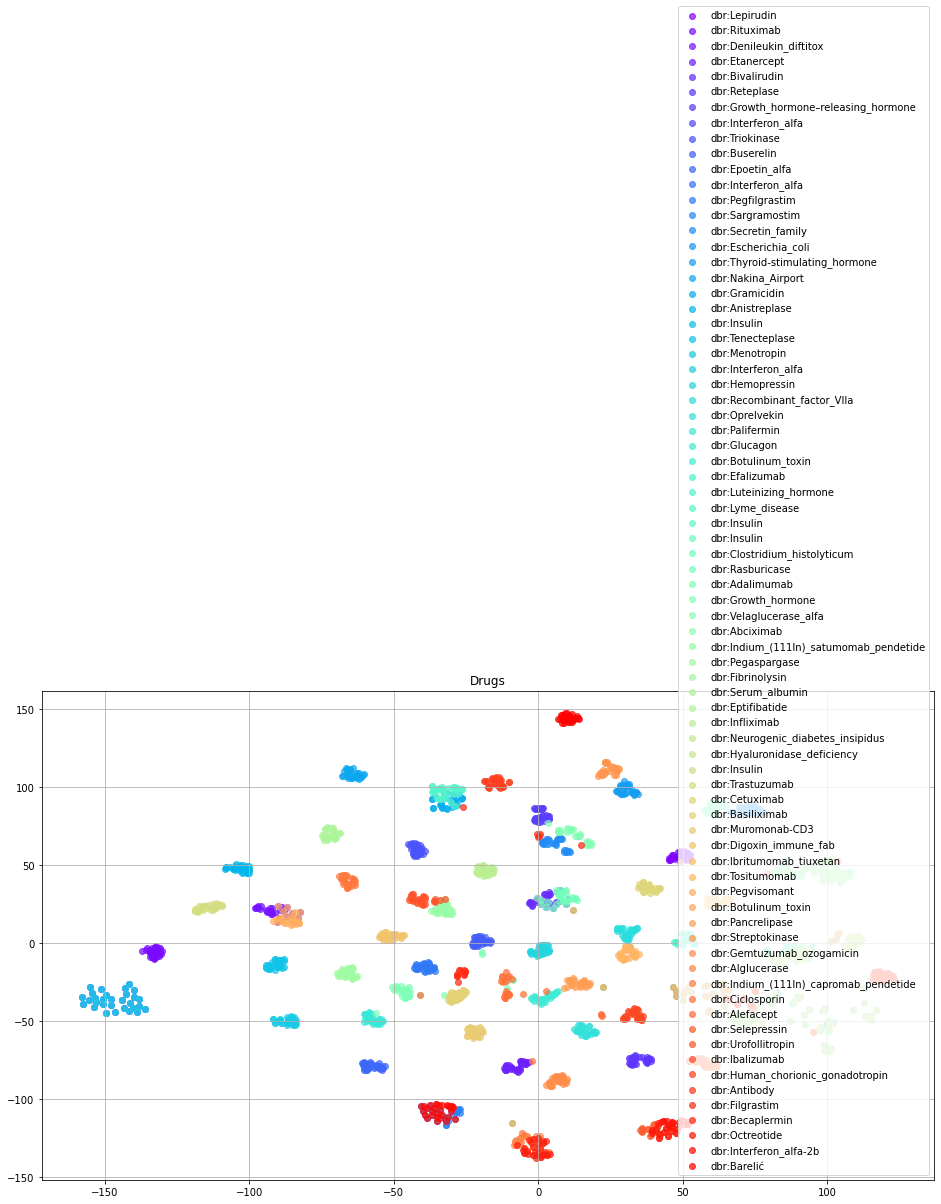

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        '''for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)'''
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Drugs', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')